In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import warnings
import time
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')

In [ ]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Create validation dataset by splitting training data (10% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Model Size, Loss, and Validation Results

Small networks (8 or 16 units) struggle to reduce the loss and end up with low validation accuracy and F1-scores. When the hidden layer becomes larger, the model learns much faster: networks with 32 units or more reach very low loss values and achieve almost perfect validation accuracy and F1-scores. This shows that larger models learn the data better and give much stronger performance.

In [ ]:
hidden_sizes = [8, 16, 32, 64, 128, 256, 512]

val_accs = []
train_accs = []
val_f1s = []
iters = []
times = []           
loss_curves = {}

for h in hidden_sizes:
    model = MLPClassifier(
        hidden_layer_sizes=(h,),
        alpha=0.0001,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        max_iter=200,
        random_state=42
    )
    
    # Measure training time
    t0 = time.time()
    model.fit(X_train, y_train)
    t1 = time.time()
    elapsed = t1 - t0

    # Store results
    loss_curves[h] = model.loss_curve_
    train_accs.append(model.score(X_train, y_train))
    
    pred_val = model.predict(X_validate)
    val_accs.append(accuracy_score(y_validate, pred_val))
    val_f1s.append(f1_score(y_validate, pred_val, average='weighted'))
    
    iters.append(model.n_iter_)
    times.append(elapsed)

# Print summary
for h, tr, a, f, it, tm in zip(hidden_sizes, train_accs, val_accs, val_f1s, iters, times):
    print(f"Hidden={h:3d} | Iter={it:3d} | Time={tm:6.2f}s | "
          f"Train Acc={tr:.5f} | Val Acc={a:.5f} | Val F1={f:.5f}" )
    
plt.figure(figsize=(8,6))

for h in hidden_sizes:
    plt.plot(loss_curves[h], label=f"h={h}")

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curves for Different Hidden Sizes")
plt.legend()
plt.grid(True)
plt.show()

c:\Users\30697\miniconda3\envs\compgeo2025\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [7]:
# Print summary
for h, tr, a, f, it, tm in zip(hidden_sizes, train_accs, val_accs, val_f1s, iters, times):
    print(f"Hidden={h:3d} | Iter={it:3d} | Time={tm:6.2f}s | "
          f"Train Acc={tr:.5f} | Val Acc={a:.5f} | Val F1={f:.5f}" )

Hidden=  8 | Iter= 18 | Time=  3.60s | Train Acc=0.04691 | Val Acc=0.04916 | Val F1=0.00461
Hidden= 16 | Iter=106 | Time= 19.50s | Train Acc=0.31402 | Val Acc=0.30991 | Val F1=0.26759
Hidden= 32 | Iter=200 | Time= 75.16s | Train Acc=0.91570 | Val Acc=0.89913 | Val F1=0.89828
Hidden= 64 | Iter= 78 | Time= 25.35s | Train Acc=0.99988 | Val Acc=0.99964 | Val F1=0.99964
Hidden=128 | Iter= 75 | Time= 35.49s | Train Acc=0.99996 | Val Acc=1.00000 | Val F1=1.00000
Hidden=256 | Iter= 62 | Time= 88.93s | Train Acc=0.99996 | Val Acc=0.99964 | Val F1=0.99964
Hidden=512 | Iter= 43 | Time=149.10s | Train Acc=0.99996 | Val Acc=1.00000 | Val F1=1.00000


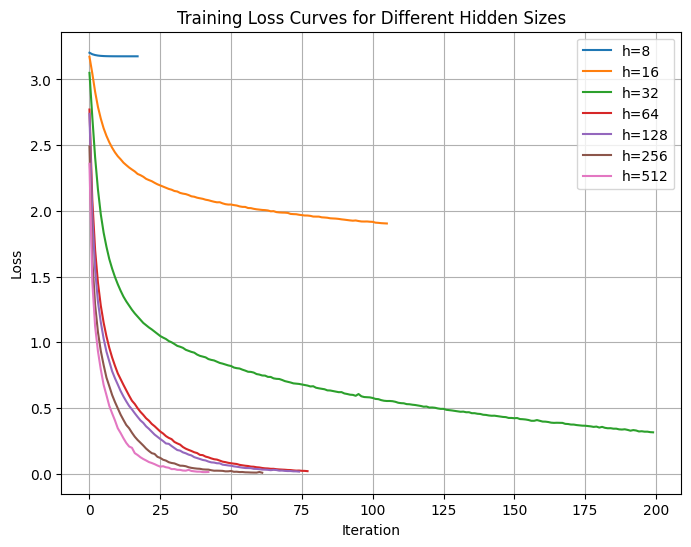

In [6]:
plt.figure(figsize=(8,6))

for h in hidden_sizes:
    plt.plot(loss_curves[h], label=f"h={h}")

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Curves for Different Hidden Sizes")
plt.legend()
plt.grid(True)
plt.show()